# House Loan Prediction using Linear Regression

### By: Shefali Shrivastava

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Raw_Housing_Data.csv")

In [3]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [4]:
data.dtypes

ID                                             int64
Date House was Sold                           object
Sale Price                                   float64
No of Bedrooms                                 int64
No of Bathrooms                              float64
Flat Area (in Sqft)                          float64
Lot Area (in Sqft)                           float64
No of Floors                                 float64
Waterfront View                               object
No of Times Visited                           object
Condition of the House                        object
Overall Grade                                  int64
Area of the House from Basement (in Sqft)    float64
Basement Area (in Sqft)                        int64
Age of House (in Years)                        int64
Renovated Year                                 int64
Zipcode                                      float64
Latitude                                     float64
Longitude                                    f

In [5]:
data.head(10)

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
5,7237550310,14 May 2017,1230000.0,4,4.50,5420.0,101930.0,1.0,No,None,...,10,3890.0,1530,17,0,98053.0,47.6561,-122.005,4760.0,101930
6,1321400060,14 June 2017,257500.0,3,2.25,1715.0,6819.0,2.0,No,None,...,7,1715.0,0,23,0,98003.0,47.3097,-122.327,2238.0,6819
7,2008000270,15 January 2016,291850.0,3,1.50,1060.0,9711.0,1.0,No,None,...,7,1060.0,0,55,0,98198.0,47.4095,-122.315,1650.0,9711
8,2414600126,15 April 2016,229500.0,3,1.00,1780.0,7470.0,1.0,No,None,...,7,1050.0,730,58,0,98146.0,47.5123,-122.337,1780.0,8113
9,3793500160,15 March 2016,323000.0,3,2.50,1890.0,6560.0,2.0,No,None,...,7,1890.0,0,15,0,98038.0,47.3684,-122.031,2390.0,7570


In [6]:
data.tail(10)

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
21603,7852140040,14 August 2017,507250.0,3,2.50,2270.0,5536.0,2.0,No,None,...,8,2270.0,0,15,0,98065.0,47.5389,-121.881,2270.0,5731
21604,9834201367,15 January 2016,429000.0,3,2.00,1490.0,1126.0,3.0,No,None,...,8,1490.0,0,4,0,98144.0,47.5699,-122.288,1400.0,1230
21605,3448900210,14 October 2017,610685.0,4,2.50,2520.0,6023.0,2.0,No,None,...,9,2520.0,0,4,0,98056.0,47.5137,-122.167,2520.0,6023
21606,7936000429,15 March 2016,1010000.0,4,3.50,3510.0,7200.0,2.0,No,None,...,9,2600.0,910,9,0,98136.0,47.5537,-122.398,2050.0,6200
21607,2997800021,15 February 2016,475000.0,3,2.50,1310.0,1294.0,2.0,No,None,...,8,1180.0,130,10,0,98116.0,47.5773,-122.409,1330.0,1265
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,None,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,None,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,None,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,None,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287
21612,1523300157,14 October 2017,325000.0,2,0.75,1020.0,1076.0,2.0,No,None,...,7,1020.0,0,10,0,98144.0,47.5941,-122.299,1020.0,1357


# target variable is sale price

In [7]:
data["Sale Price"].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

# outlier detection

<AxesSubplot:xlabel='Sale Price'>

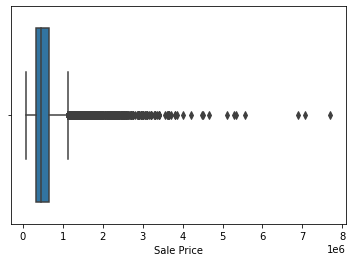

In [8]:
sns.boxplot(x=data["Sale Price"])

# treating outliers

In [9]:
data.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [10]:
q1=data["Sale Price"].quantile(.25)
q3=data["Sale Price"].quantile(.75)
print(q1)
print(q3)
iqr=q3-q1
upperlimit=q3+1.5*iqr
lowerlimit=min(data["Sale Price"])
upperlimit,lowerlimit



321950.0
645000.0


(1129575.0, 75000.0)

In [11]:
def limit_imputer(value):
    if value>upperlimit:
        return upperlimit
    if value<lowerlimit:
        return lowerlimit
    else:
        return value


In [12]:
data["Sale Price"]=data["Sale Price"].apply(limit_imputer)

In [13]:
data["Sale Price"].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

<AxesSubplot:xlabel='Sale Price'>

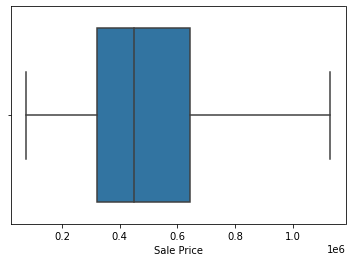

In [14]:
sns.boxplot(x=data["Sale Price"])

# Treating Missing Values

In [15]:
data.dropna(subset=['Sale Price'],axis=0,inplace=True)

In [16]:
numerical_columns=['No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)','Area of the House from Basement (in Sqft)','Latitude','Longitude','Living Area after Renovation (in Sqft)']
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(missing_values=np.nan, strategy='median')
data[numerical_columns]=imputer.fit_transform(data[numerical_columns])

In [17]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [18]:
column=data['Zipcode'].values.reshape(-1,1)
x=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
data['Zipcode']=x.fit_transform(column)

In [19]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


# All missing values treated

In [20]:
data.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

# Feature Engineering

<BarContainer object of 5 artists>

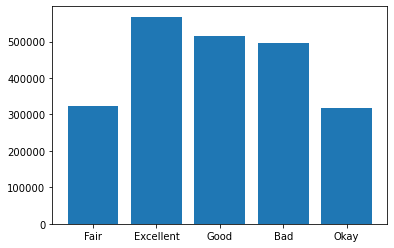

In [21]:
plt.bar(data['Condition of the House'].unique(), data.groupby('Condition of the House')['Sale Price'].mean())

In [22]:
def luxury_home(row):
    count=0
    if row[0]=='Yes':
        count+=1
    if row[1] in ['Good','Excellent']:
        count+=1
    if row[2]>=8:
        count+=1
    if count>=2:
        return 'Yes'
    else:
        return 'No'
data['luxury_home']=data[["Waterfront View","Condition of the House","Overall Grade"]].apply(luxury_home, axis=1)
data['luxury_home'].unique() 

array(['No', 'Yes'], dtype=object)

In [23]:
data.drop(columns=['ID'],inplace=True)

In [24]:
mapping={'Bad':'0',
        'Good':'3',
        'Okay':'1',
        'Fair':'2',
        'Excellent':'4'}
data['Condition of the House']=data['Condition of the House'].map(mapping)

In [25]:
data["No of Times Visited"].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [26]:
mapping={'None':'0',
        'Once':'1',
        'Twice':'2',
        'Thrice':'3',
        'Four':'4'}
data['No of Times Visited']=data['No of Times Visited'].map(mapping)

In [27]:
data.head()

,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),luxury_home
0,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,2,...,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,No
1,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,2,...,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,No
2,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,2,...,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,No
3,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,4,...,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,No
4,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,2,...,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,No


In [28]:
data['Ever Renovated']=np.where(data['Renovated Year']==0,'No','Yes')

In [29]:
data['Purchase Year']=pd.DatetimeIndex(data['Date House was Sold']).year

In [30]:
data['Year since renovation']=np.where(data['Ever Renovated']=='Yes',abs(data['Purchase Year']-data['Renovated Year']),0)

In [31]:
data.drop(columns=['Renovated Year','Purchase Year'],inplace=True,axis=1)

In [32]:
data.head()

,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),luxury_home,Ever Renovated,Year since renovation
0,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,2,...,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,No,0
1,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,2,...,400,67,98125.0,47.7210,-122.319,1690.0,7639,No,Yes,26
2,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,2,...,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,No,0
3,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,4,...,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,No,0
4,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,2,...,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,No,0


In [33]:
zip_table=data.groupby('Zipcode').agg({'Sale Price':'mean'}).sort_values('Sale Price',ascending=True)

In [34]:
zip_table['zipcode_group']=pd.cut(zip_table['Sale Price'],bins=10,labels=['zipcode_group0',
                                                                         'zipcode_group1',
                                                                         'zipcode_group2',
                                                                         'zipcode_group3',
                                                                         'zipcode_group4',
                                                                         'zipcode_group5',
                                                                         'zipcode_group6',
                                                                         'zipcode_group7',
                                                                         'zipcode_group8',
                                                                         'zipcode_group9'])                                   

In [35]:
zip_table.drop(columns=['Sale Price'],inplace=True)
data=pd.merge(data,zip_table,left_on='Zipcode',how='left',right_index=True)
data=data.drop(columns='Zipcode')

In [36]:
data.head()

,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),luxury_home,Ever Renovated,Year since renovation,zipcode_group
0,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,2,...,0,63,47.5112,-122.257,1340.0,5650,No,No,0,zipcode_group0
1,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,2,...,400,67,47.7210,-122.319,1690.0,7639,No,Yes,26,zipcode_group2
2,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,2,...,0,85,47.7379,-122.233,2720.0,8062,No,No,0,zipcode_group2
3,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,4,...,910,53,47.5208,-122.393,1360.0,5000,No,No,0,zipcode_group3
4,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,2,...,0,31,47.6168,-122.045,1800.0,7503,No,No,0,zipcode_group4


In [37]:
data['zipcode_group']=data['zipcode_group'].map({'zipcode_group0':'0',
                                                 'zipcode_group1':'1',
                                                 'zipcode_group2':'2',
                                                 'zipcode_group3':'3',
                                                 'zipcode_group4':'4',
                                                 'zipcode_group5':'5',
                                                 'zipcode_group6':'6',
                                                 'zipcode_group7':'7',
                                                 'zipcode_group8':'8',
                                                 'zipcode_group9':'9'})
                                               
                                                 

In [38]:
data.head()

,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),luxury_home,Ever Renovated,Year since renovation,zipcode_group
0,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,2,...,0,63,47.5112,-122.257,1340.0,5650,No,No,0,0
1,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,2,...,400,67,47.7210,-122.319,1690.0,7639,No,Yes,26,2
2,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,2,...,0,85,47.7379,-122.233,2720.0,8062,No,No,0,2
3,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,4,...,910,53,47.5208,-122.393,1360.0,5000,No,No,0,3
4,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,2,...,0,31,47.6168,-122.045,1800.0,7503,No,No,0,4


In [39]:
data['zipcode_group'].value_counts()

0    4383
2    4076
4    4034
3    3235
1    2364
6    1652
5     947
8     599
7     269
9      50
Name: zipcode_group, dtype: int64

In [40]:
data.drop(columns=['Date House was Sold'],inplace=True)

In [41]:
data=pd.get_dummies(data,columns=['Waterfront View','luxury_home','Ever Renovated'],drop_first=True)
data.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),...,Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Year since renovation,zipcode_group,Waterfront View_Yes,luxury_home_Yes,Ever Renovated_Yes
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,2,7,1180.0,...,63,47.5112,-122.257,1340.0,5650,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,2,7,2170.0,...,67,47.7210,-122.319,1690.0,7639,26,2,0,0,1
2,180000.0,2,1.00,770.0,10000.0,1.0,0,2,6,770.0,...,85,47.7379,-122.233,2720.0,8062,0,2,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,4,7,1050.0,...,53,47.5208,-122.393,1360.0,5000,0,3,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,2,8,1680.0,...,31,47.6168,-122.045,1800.0,7503,0,4,0,0,0


In [42]:
def age_of_house(x):
  if x < 10:
    x = 2
  elif x < 50:
    x = 1
  else:
    x = 0
  return x

In [43]:
data["cat_house_age"] = data['Age of House (in Years)'].map(age_of_house)
data["cat_house_age"].unique()

array([0, 1, 2], dtype=int64)

In [44]:
data.drop(columns=['Age of House (in Years)'],inplace=True)

In [45]:
data.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),...,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Year since renovation,zipcode_group,Waterfront View_Yes,luxury_home_Yes,Ever Renovated_Yes,cat_house_age
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,2,7,1180.0,...,47.5112,-122.257,1340.0,5650,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,2,7,2170.0,...,47.7210,-122.319,1690.0,7639,26,2,0,0,1,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,2,6,770.0,...,47.7379,-122.233,2720.0,8062,0,2,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,4,7,1050.0,...,47.5208,-122.393,1360.0,5000,0,3,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,2,8,1680.0,...,47.6168,-122.045,1800.0,7503,0,4,0,0,0,1


In [46]:
data.columns

Index(['Sale Price', 'No of Bedrooms', 'No of Bathrooms',
       'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'No of Floors',
       'No of Times Visited', 'Condition of the House', 'Overall Grade',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Latitude', 'Longitude', 'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)', 'Year since renovation',
       'zipcode_group', 'Waterfront View_Yes', 'luxury_home_Yes',
       'Ever Renovated_Yes', 'cat_house_age'],
      dtype='object')

# Scaling the data

In [47]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
y=data['Sale Price']
X=scaler.fit_transform(data.drop(columns=['Sale Price']))
X=pd.DataFrame(data=X, columns=data.drop(columns=['Sale Price']).columns)

data.isnull().sum()

Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
Year since renovation                        0
zipcode_group                                0
Waterfront View_Yes                          0
luxury_home_Yes                              0
Ever Renovated_Yes                           0
cat_house_age                                0
dtype: int64

# multicollinearity detection

In [48]:
k=X.corr()
z=[[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j]>abs(0.5))&(i!=j)]
z,len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['No of Floors', 'cat_house_age'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basem

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=X
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF

No of Bedrooms                                  1.635188
No of Bathrooms                                 3.244542
Flat Area (in Sqft)                          1481.605258
Lot Area (in Sqft)                              2.102685
No of Floors                                    2.098452
No of Times Visited                             1.420969
Condition of the House                          1.536479
Overall Grade                                   3.017037
Area of the House from Basement (in Sqft)    1205.506883
Basement Area (in Sqft)                       345.454102
Latitude                                        1.581262
Longitude                                       1.469915
Living Area after Renovation (in Sqft)          3.049394
Lot Area after Renovation (in Sqft)             2.136747
Year since renovation                           2.786872
zipcode_group                                   1.871386
Waterfront View_Yes                             1.241417
luxury_home_Yes                

In [50]:
def MC_remover(data):
    VIF=VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
    if VIF.max()>5:
        print(VIF[VIF==VIF.max()].index[0]," is Removed")
        data=data.drop(columns=VIF[VIF==VIF.max()].index[0])
        return data
    else:
        print('No multicollinearity present')
        return data

for i in range(7):
    vif_data=MC_remover(vif_data)

Flat Area (in Sqft)  is Removed
No multicollinearity present
No multicollinearity present
No multicollinearity present
No multicollinearity present
No multicollinearity present
No multicollinearity present


# Linear Regression

In [51]:
X=vif_data
y=data['Sale Price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=101)


from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
lr.fit(X_train,y_train)

LinearRegression(normalize=True)

In [52]:
predictions=lr.predict(X_test)
lr.score(X_test,y_test)

0.8397089441212797